In [1]:
# Load all dictionaries
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import scikit_posthocs as sp
from scipy.stats import wilcoxon
from heatmaps_functions import *
from linares_plot import *

sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [49]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trdist_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trdist_isol.xlsx']

In [50]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trdist_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trdist_isol.xlsx']

In [51]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['trained'] = df_target['trained'].replace(['trdist'], ['dist'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['trained'] = df_target_shuff['trained'].replace(['trdist'], ['dist'])

In [52]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['trained'] = df_distractor['trained'].replace(['trdist'], ['dist'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['trained'] = df_distractor_shuff['trained'].replace(['trdist'], ['dist'])


In [53]:
df = pd.concat([df_target, df_distractor])
df.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-4.569766,ips,n001,2_0.2,signal,target,dist
1,2.335,-5.463212,ips,n001,2_0.2,signal,target,dist
2,4.670,-2.216977,ips,n001,2_0.2,signal,target,dist
3,7.005,-1.619713,ips,n001,2_0.2,signal,target,dist
4,9.340,2.070236,ips,n001,2_0.2,signal,target,dist


In [54]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,0.108931,visual,d001,1_0.2,shuffle,target,dist
1,2.335,-0.806392,visual,d001,1_0.2,shuffle,target,dist
2,4.670,-0.897047,visual,d001,1_0.2,shuffle,target,dist
3,7.005,-0.547003,visual,d001,1_0.2,shuffle,target,dist
4,9.340,0.130638,visual,d001,1_0.2,shuffle,target,dist


In [55]:
df_trdist = df
df_shuff_trdist=df_shuff

In [9]:
df_delay_dist=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                ####
                if cond == '1_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &                                           
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                    ###
                    df_delay_dist.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )
                    #                    
                elif cond == '2_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std() 
                    ###
                    df_delay_dist.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )    
                    #
                elif cond =='1_7':
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_dist.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_dist.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )        
                        #
                    #
                #
                elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_dist.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                        #
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_dist.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                ###
            ###
        ##
    ##
##
##
##
df_delay_dist = pd.DataFrame(df_delay_dist)
df_delay_dist.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay_dist['trained'] = 'delay dist alone'


In [35]:
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_target_trtarg_isol.xlsx']
paths_target_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_target_trtarg_isol.xlsx']

In [36]:
paths_distractor=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_dist_trtarg_isol.xlsx']
paths_distractor_shuff=[  'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_dist_trtarg_isol.xlsx']

In [37]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['trained'] = df_target['trained'].replace(['trtarg'], ['target'])

####################

for PathI in paths_target_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['trained'] = df_target_shuff['trained'].replace(['trtarg'], ['target'])

In [38]:
df_distractor=[]
df_distractor_shuff=[]


for PathI in paths_distractor:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['trained'] = df_distractor['trained'].replace(['trtarg'], ['target'])


####################

for PathI in paths_distractor_shuff:
    path_save_signal =PathI
    #
    dec_thing = path_save_signal.split('\\')[-1].split('.')[0].split('_')[2]
    training_region = path_save_signal.split('\\')[-1].split('.')[0].split('_')[3]
    #
    df_x = pd.read_excel(PathI)
    df_x['item'] = dec_thing
    df_x['trained'] =training_region
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['trained'] = df_distractor_shuff['trained'].replace(['trtarg'], ['target'])


In [39]:
df = pd.concat([df_target, df_distractor])
df.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-4.794391,ips,n001,2_0.2,signal,target,target
1,2.335,-9.479238,ips,n001,2_0.2,signal,target,target
2,4.670,-6.100251,ips,n001,2_0.2,signal,target,target
3,7.005,1.818535,ips,n001,2_0.2,signal,target,target
4,9.340,7.679894,ips,n001,2_0.2,signal,target,target


In [40]:
df_shuff = pd.concat([df_target_shuff, df_distractor_shuff])
df_shuff.head()

,times,decoding,region,subject,condition,label,item,trained
0,0.000,-0.627765,visual,d001,1_0.2,shuffle,target,target
1,2.335,-0.297670,visual,d001,1_0.2,shuffle,target,target
2,4.670,1.185859,visual,d001,1_0.2,shuffle,target,target
3,7.005,1.466606,visual,d001,1_0.2,shuffle,target,target
4,9.340,0.395745,visual,d001,1_0.2,shuffle,target,target


In [41]:
df_trtarg = df
df_shuff_trtarg=df_shuff

In [16]:
df_delay_target=[]
for cond in ['1_0.2', '1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for item in ['target', 'dist']:
                ####
                if cond == '1_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &                                           
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                    ###
                    df_delay_target.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )
                    #                    
                elif cond == '2_0.2':
                    dfn = df.loc[(df['region']==reg) & 
                             ( (df['times']>= 9.34) & (df['times']<= 18.688) ) & 
                             ( df['condition']==cond) & (df['subject']==subj) &  
                             ( df['item']==item)]
                    #
                    dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                             ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 18.688) ) & 
                             ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                             ( df_shuff['item']==item)]

                    ###
                    decoding = dfn.decoding.mean() #option1
                    #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                    decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std() 
                    ###
                    df_delay_target.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                  item] )    
                    #
                elif cond =='1_7':
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_target.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_target.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )        
                        #
                    #
                #
                elif cond =='2_7': ##just the TRs they are "alone"; in 1_ there is coexistance!
                    if item=='target':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_target.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                        #
                    elif item=='dist':
                        dfn = df.loc[(df['region']==reg) & 
                                 ( (df['times']== 9.34) | (df['times']== 11.675) ) & 
                                 ( df['condition']==cond) & (df['subject']==subj) &  
                                 ( df['item']==item)]
                        #
                        dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                                 ( (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675  ) ) & 
                                 ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                                 ( df_shuff['item']==item)]

                        ###
                        decoding = dfn.decoding.mean() #option1
                        #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                        decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()
                        ###
                        df_delay_target.append( [ 'delay1', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                                      item] )   
                    ####
                ###
            ###
        ##
    ##
##
##
##
df_delay_target = pd.DataFrame(df_delay_target)
df_delay_target.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item']
df_delay_target['trained'] = 'delay target alone'


## Compare models plots

In [24]:
df=pd.concat([df_delay_target, df_delay_dist])
df['trained_in'] = df['trained'].copy()
df['trained_in'] = df['trained_in'].replace([ 'delay target alone',  'delay dist alone'], ['tr: target alone', 'tr: distractor alone'])

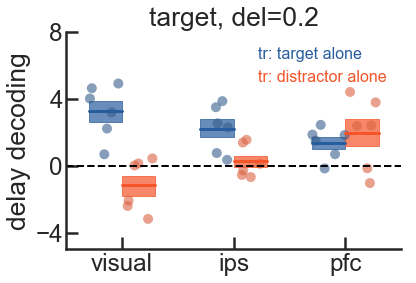

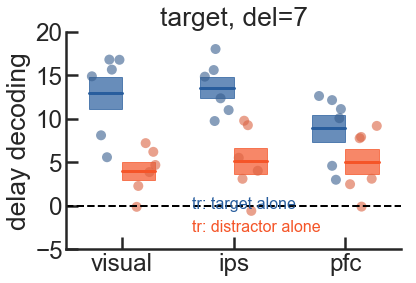

In [34]:
linares_plot(x='region', y='decoding_sh', hue='trained_in', order=['visual', 'ips', 'pfc'], 
             hue_order=['tr: target alone', 'tr: distractor alone'],
            df=df.loc[(df['condition']!='1_7')  & (df['condition']!='2_7') & (df['item']=='target')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')# (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('target, del=0.2')
plt.show()


linares_plot(x='region', y='decoding_sh', hue='trained_in', order=['visual', 'ips', 'pfc'], 
             hue_order=['tr: target alone', 'tr: distractor alone'],
            df=df.loc[(df['condition']!='1_0.2')  & (df['condition']!='2_0.2') & (df['item']=='target')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')# (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-5,0,5,10,15,20])
plt.title('target, del=7')
plt.show()

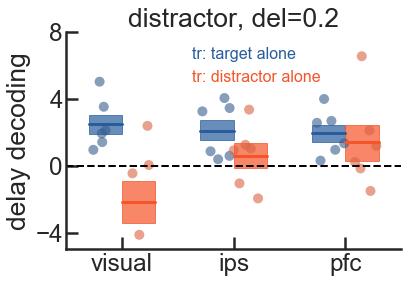

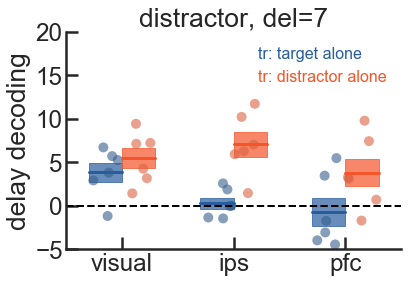

In [36]:
linares_plot(x='region', y='decoding_sh', hue='trained_in', order=['visual', 'ips', 'pfc'], 
             hue_order=['tr: target alone', 'tr: distractor alone'],
            df=df.loc[(df['condition']!='1_7')  & (df['condition']!='2_7') & (df['item']=='dist')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')# (std. dist.)')
plt.gca().set_ylim(-5,8)
plt.gca().set_yticks([-4,0,4,8])
plt.title('distractor, del=0.2')
plt.show()


linares_plot(x='region', y='decoding_sh', hue='trained_in', order=['visual', 'ips', 'pfc'], 
             hue_order=['tr: target alone', 'tr: distractor alone'],
            df=df.loc[(df['condition']!='1_0.2')  & (df['condition']!='2_0.2') & (df['item']=='dist')], 
            palette=['#285d9d', '#f55528'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('delay decoding')# (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-5,0,5,10,15,20])
plt.title('distractor, del=7')
plt.show()

In [56]:
df = pd.concat([df_trdist, df_trtarg])
df_shuff = pd.concat([df_shuff_trdist, df_shuff_trtarg])

In [ ]:
#### delay 0.2 compare decoding of target depending on trianing regime

In [68]:
df_delay=[]
for cond in ['1_0.2', '2_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']>= 9.34) & (df['times']<= 16.345) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='target') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 16.345) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,0.830058,0.623998,visual,d001,1_0.2,signal,target,target
1,delay,1.595277,1.554566,visual,d001,1_0.2,signal,target,dist
2,delay,2.841734,3.828957,visual,s001,1_0.2,signal,target,target
3,delay,-0.591792,-0.802899,visual,s001,1_0.2,signal,target,dist
4,delay,3.691334,8.179025,visual,l001,1_0.2,signal,target,target


Text(0.5,1,'d0.2 training comparison')

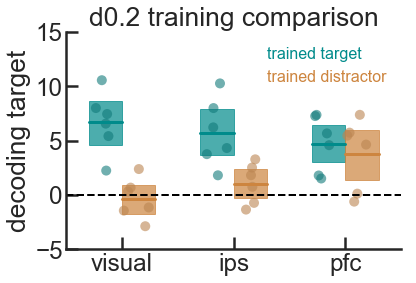

In [70]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')
plt.gca().set_ylim(-5,15)
plt.gca().set_yticks([-5,0,5,10,15])
plt.title('d0.2 training comparison')

In [ ]:
####condition 2_7 compare decoding of target depending on trianing regime

In [72]:
df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         (  (df['times']== 16.345) | (df['times']== 18.68  ) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='target') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         (  (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='target') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,2.087704,8.995947,visual,d001,2_7,signal,target,target
1,delay,1.604394,4.227240,visual,d001,2_7,signal,target,dist
2,delay,2.606322,3.396669,visual,s001,2_7,signal,target,target
3,delay,-0.531939,-1.567235,visual,s001,2_7,signal,target,dist
4,delay,5.765091,14.661722,visual,l001,2_7,signal,target,target


Text(0.5,1,'2_7 training comparison')

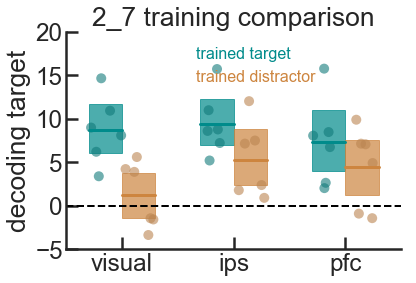

In [75]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding target')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-5,0,5,10,15,20])
plt.title('2_7 training comparison')

In [ ]:
#### delay 0.2 compare decoding of distractor depending on trianing regime

In [76]:
df_delay=[]
for cond in ['1_0.2', '2_0.2']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                dfn = df.loc[(df['region']==reg) & 
                         ( (df['times']>= 9.34) & (df['times']<= 16.345) ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='dist') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         ( (df_shuff['times']>= 9.34) & (df_shuff['times']<= 16.345) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,3.373895,4.006226,visual,d001,1_0.2,signal,target,target
1,delay,2.864669,3.677681,visual,d001,1_0.2,signal,target,dist
2,delay,6.266024,11.793757,visual,s001,1_0.2,signal,target,target
3,delay,1.490363,3.104800,visual,s001,1_0.2,signal,target,dist
4,delay,4.022359,9.028210,visual,l001,1_0.2,signal,target,target


Text(0.5,1,'d0.2 training comparison')

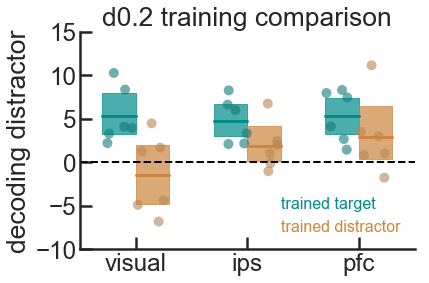

In [79]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
plt.gca().set_ylim(-10,15)
plt.gca().set_yticks([-10,-5,0,5,10,15])
plt.title('d0.2 training comparison')

In [ ]:
### condition 2_7 decode distractor different training 1st delay

In [83]:
df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         (   (df['times']== 9.34) | (df['times']== 11.675)  ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='dist') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         (  (df_shuff['times']== 9.34) | (df_shuff['times']== 11.675)  ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,4.517295,5.336880,visual,d001,2_7,signal,target,target
1,delay,3.980518,10.217482,visual,d001,2_7,signal,target,dist
2,delay,-0.255546,-0.755193,visual,s001,2_7,signal,target,target
3,delay,6.403869,17.638035,visual,s001,2_7,signal,target,dist
4,delay,4.870800,8.435251,visual,l001,2_7,signal,target,target


Text(0.5,1,'2_7 training comparison')

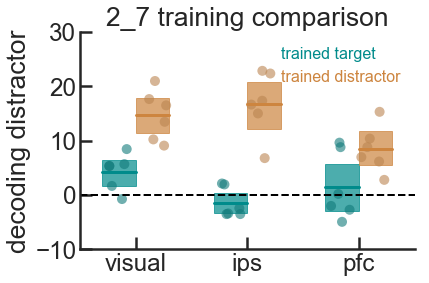

In [85]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
plt.gca().set_ylim(-10,30)
plt.gca().set_yticks([-10,0,10,20,30])
plt.title('2_7 training comparison')

In [ ]:
### condition 2_7 decode distractor different training 2nd delay

In [87]:
df_delay=[]
for cond in ['2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for trained in ['target', 'dist']:
                ####
                dfn = df.loc[(df['region']==reg) & 
                         (   (df['times']== 16.345) | (df['times']== 18.68  )  ) & 
                         ( df['condition']==cond) & (df['subject']==subj) &                                           
                         ( df['item']=='dist') & ( df['trained']==trained)]
                #
                dfn_shuff = df_shuff.loc[(df_shuff['region']==reg) & 
                         (  (df_shuff['times']== 16.345) | (df_shuff['times']== 18.68  ) ) & 
                         ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                         ( df_shuff['item']=='dist') & ( df_shuff['trained']==trained)]

                ###
                decoding = dfn.decoding.mean() #option1
                #decoding_sh = dfn.decoding.mean() - dfn_shuff.decoding.mean() #option2
                decoding_sh = (dfn.decoding.mean() - dfn_shuff.decoding.mean()) / dfn_shuff.decoding.std()  #option2
                ###
                df_delay.append( [ 'delay', decoding, decoding_sh, reg, subj, cond, dfn.label.iloc[0],
                              'target', trained] )
###
df_delay = pd.DataFrame(df_delay)
df_delay.columns=['times', 'decoding', 'decoding_sh','region', 'subject', 'condition', 'label', 'item', 'trained']
df_delay.head()

,times,decoding,decoding_sh,region,subject,condition,label,item,trained
0,delay,-2.053840,-3.353938,visual,d001,2_7,signal,target,target
1,delay,-7.247827,-13.911840,visual,d001,2_7,signal,target,dist
2,delay,3.968384,6.399836,visual,s001,2_7,signal,target,target
3,delay,-6.653888,-17.489340,visual,s001,2_7,signal,target,dist
4,delay,3.584670,8.457990,visual,l001,2_7,signal,target,target


Text(0.5,1,'2_7 training comparison')

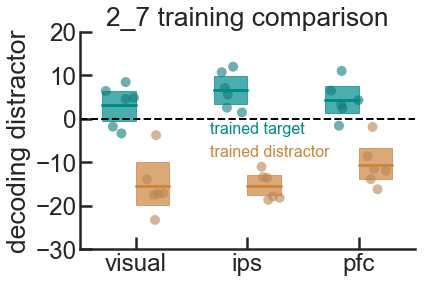

In [90]:
df_delay['trained'] = df_delay['trained'].replace(['target', 'dist'], ['trained target', 'trained distractor'])

linares_plot(x='region', y='decoding_sh', hue='trained', order=['visual', 'ips', 'pfc'], 
             hue_order=['trained target', 'trained distractor'],
            df=df_delay, 
            palette=['darkcyan', 'peru'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding distractor')
plt.gca().set_ylim(-30,20)
plt.gca().set_yticks([-30, -20, -10, 0,10,20])
plt.title('2_7 training comparison')